### Ford GoBike System Data: Exploratory Analysis

#### Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for 2017. There is a total of 519,700 entries with fifteen variables accounted for and recorded.

For this project, I will conduct an exploratory analysis on data from Ford GoBike System, a bike-sharing system provider to make discoveries about the dataset. I hope to reveal interesting stories about the average trip duration for certain bike users.

#### Questions to ponder on through exploration:

1. How long was the average trip in 2017?
2. Does average trip duration depend on if an user is a subscriber or customer?
3. Does average trip duration vary on the age of user?
4. Does average trip duration depend on if user is female or male?

### Preliminary Data Wrangling

#### Part l: Gathering Data

In [1]:
# Import packages needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load and read dataset
df= pd.read_csv('2017-bike-data.csv')
df.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year member_gender  
0            -122.415929       96    Customer             1987.0          Male  
1            -122.426614       88    Customer             1965.0        Female  
2            -122.267764     1094    Customer                NaN           NaN  
3            -122.408445     2831    Customer                NaN           NaN  
4            -122.265896     3167  Subscriber             1997.0        Female

#### Part ll: Assessing Data

In [3]:
# Look at size of dataset and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [4]:
# Look at some descriptive statistics of dataset
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  519700.000000     519700.000000           519700.000000   
mean     1099.009521         95.034245               37.771653   
std      3444.146451         86.083078                0.086305   
min        61.000000          3.000000               37.317298   
25%       382.000000         24.000000               37.773492   
50%       596.000000         67.000000               37.783521   
75%       938.000000        139.000000               37.795392   
max     86369.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            519700.000000   519700.000000         519700.000000   
mean               -122.363927       92.184041             37.771844   
std                   0.105573       84.969491              0.086224   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.000000             37.774520   
50%                -122.398870       66.000000             37.783830   
75%                -122.391034      134.000000             37.795392   
max                -121.874119      340.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          519700.000000  519700.000000      453159.000000  
mean             -122.363236    1672.533079        1980.404787  
std                 0.105122     971.356959          10.513488  
min              -122.444293      10.000000        1886.000000  
25%              -122.410345     787.000000        1974.000000  
50%              -122.398525    1728.500000        1983.000000  
75%              -122.391034    2520.000000        1988.000000  
max              -121.874119    3733.000000        1999.000000

**Quality and Tidiness Issues**
1. Calculate age of users with birth year
2. Remove null rows for columns member_birth_year and member_gender
3. Remove member ages that are greater than 60
4. Convert bike ride duration in seconds to minutes
5. Remove member genders listed as "Other"

### What is the structure of your dataset?

There are 519,700 bike rides in the dataset with 15 features (duration, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, member birth year, and member gender). 

Most variables are numeric in nature, but the variables user type and member gender are categorical and nominal . The variables with id contains numbers that are nominal as well. 

### What is/are the main feature(s) of interest in your dataset?

I am most interested in discovering what features may determine the average trip duration of bike rides among riders with consideration to their age, gender, and if they are a customer or subscriber of the bike-sharing system.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the user type will have the strongest effect on the average trip duration: I predict customers will have a longer average trip duration as they would want to make the most of their one-time ride purchase. As for subscribers, I expect that they will have a shorter average trip duration as they are not being charged extra for additional rides, they are simply making use of their subscription. I also think age and gender will have effects on the average trip duration, though to a smaller degree than the main effect of user type.

#### Part lll: Cleaning Data

In [5]:
# Create copies of original dataset
df_clean = df.copy()

In [6]:
# Check for duplicates
df_clean.duplicated().sum()

0

**Define**

*Calculate age of users with birth year*

**Code**

In [7]:
# Calculate age by subtracting from the year data was taken from, 2017
df_clean['member_age'] = 2017-df_clean['member_birth_year']

**Test**

In [8]:
# Check dataset
df_clean.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.415929       96    Customer             1987.0   
1            -122.426614       88    Customer             1965.0   
2            -122.267764     1094    Customer                NaN   
3            -122.408445     2831    Customer                NaN   
4            -122.265896     3167  Subscriber             1997.0   

  member_gender  member_age  
0          Male        30.0  
1        Female        52.0  
2           NaN         NaN  
3           NaN         NaN  
4        Female        20.0

In [9]:
# Remove unnecessary columns for analysis
df_clean.drop(columns= ['start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'member_birth_year'], inplace = True)

In [10]:
# Check removal of columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 4 columns):
duration_sec     519700 non-null int64
user_type        519700 non-null object
member_gender    453238 non-null object
member_age       453159 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.9+ MB


In [11]:
# Review columns
df_clean

duration_sec   user_type member_gender  member_age
0              80110    Customer          Male        30.0
1              78800    Customer        Female        52.0
2              45768    Customer           NaN         NaN
3              62172    Customer           NaN         NaN
4              43603  Subscriber        Female        20.0
5               9226    Customer           NaN         NaN
6               4507    Customer        Female        26.0
7               4334    Customer           NaN         NaN
8               4150    Customer           NaN         NaN
9               4238    Customer           NaN         NaN
10              3292    Customer           NaN         NaN
11              3177    Customer           NaN         NaN
12              2183  Subscriber          Male        27.0
13              2170  Subscriber          Male        27.0
14              2697    Customer           NaN         NaN
15              1544  Subscriber        Female        37.0
16              1474  Subscriber          Male        38.0
17              1397    Customer           NaN         NaN
18              1532  Subscriber         Other        29.0
19              1216  Subscriber          Male        46.0
20               386  Subscriber          Male        25.0
21              4174    Customer           NaN         NaN
22               422  Subscriber          Male        32.0
23              1165    Customer           NaN         NaN
24              1149    Customer           NaN         NaN
25              1130    Customer           NaN         NaN
26              1003    Customer           NaN         NaN
27               862    Customer           NaN         NaN
28               871  Subscriber          Male        38.0
29               784    Customer           NaN         NaN
...              ...         ...           ...         ...
519670           123  Subscriber        Female        40.0
519671            73  Subscriber          Male        35.0
519672          1909  Subscriber          Male        33.0
519673          1908  Subscriber          Male        28.0
519674           672  Subscriber          Male        38.0
519675           602  Subscriber          Male        48.0
519676           893  Subscriber          Male        46.0
519677          1136  Subscriber          Male        33.0
519678           268  Subscriber        Female        33.0
519679           321  Subscriber          Male        30.0
519680           797  Subscriber          Male        44.0
519681           720  Subscriber          Male        30.0
519682           484  Subscriber          Male        30.0
519683           889  Subscriber        Female        33.0
519684           510  Subscriber          Male        51.0
519685           486  Subscriber          Male        31.0
519686           379  Subscriber        Female        61.0
519687           640  Subscriber          Male        39.0
519688           410  Subscriber          Male        38.0
519689           278  Subscriber          Male        65.0
519690           553  Subscriber          Male        44.0
519691          1086  Subscriber          Male        59.0
519692          1201  Subscriber          Male        32.0
519693           590  Subscriber          Male        34.0
519694           730  Subscriber          Male        37.0
519695           435  Subscriber          Male        26.0
519696           431  Subscriber          Male        44.0
519697           424  Subscriber        Female        32.0
519698           366  Subscriber          Male        36.0
519699           188  Subscriber          Male        33.0

[519700 rows x 4 columns]

#### Define

*Remove null rows for columns member_birth_year and member_gender*

#### Code

In [12]:
# Remove null values from member_gender and member_age columns
df_clean.dropna(inplace = True)

#### Test

In [13]:
# Check for null values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 4 columns):
duration_sec     453159 non-null int64
user_type        453159 non-null object
member_gender    453159 non-null object
member_age       453159 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.3+ MB


In [14]:
# Look at dataset
df_clean.head()

duration_sec   user_type member_gender  member_age
0          80110    Customer          Male        30.0
1          78800    Customer        Female        52.0
4          43603  Subscriber        Female        20.0
6           4507    Customer        Female        26.0
12          2183  Subscriber          Male        27.0

In [15]:
# Check statistics of dataset
df_clean.describe()

duration_sec     member_age
count  453159.000000  453159.000000
mean      832.934014      36.595213
std      2525.280717      10.513488
min        61.000000      18.000000
25%       364.000000      29.000000
50%       556.000000      34.000000
75%       838.000000      43.000000
max     86252.000000     131.000000

#### Define

*Remove member ages that are greater than 60*

#### Code

In [16]:
# Look for the 95th percentile to remove outliers
df_clean.member_age.describe(percentiles = [ .95])

count    453159.000000
mean         36.595213
std          10.513488
min          18.000000
50%          34.000000
95%          56.000000
max         131.000000
Name: member_age, dtype: float64

For the 95th percentile, the age is 54, I will remove records of ages greater than 60. This will help with relevancy of data.

In [17]:
# Remove member_age that is greater than 60
df_clean = df_clean.query('member_age <=60')

#### Test

In [18]:
# Check code
check_60 = df_clean.loc[(df_clean['member_age'] > 60)]
len(check_60)

0

In [19]:
# Look at dataset info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441267 entries, 0 to 519699
Data columns (total 4 columns):
duration_sec     441267 non-null int64
user_type        441267 non-null object
member_gender    441267 non-null object
member_age       441267 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.8+ MB


In [20]:
# View dataset
df_clean

duration_sec   user_type member_gender  member_age
0              80110    Customer          Male        30.0
1              78800    Customer        Female        52.0
4              43603  Subscriber        Female        20.0
6               4507    Customer        Female        26.0
12              2183  Subscriber          Male        27.0
13              2170  Subscriber          Male        27.0
15              1544  Subscriber        Female        37.0
16              1474  Subscriber          Male        38.0
18              1532  Subscriber         Other        29.0
19              1216  Subscriber          Male        46.0
20               386  Subscriber          Male        25.0
22               422  Subscriber          Male        32.0
28               871  Subscriber          Male        38.0
32               733  Subscriber        Female        37.0
33               781    Customer        Female        26.0
34               475  Subscriber          Male        39.0
35               152  Subscriber          Male        37.0
36               249  Subscriber          Male        24.0
39               243  Subscriber          Male        40.0
40               833  Subscriber          Male        33.0
41               820  Subscriber        Female        34.0
46               538    Customer          Male        26.0
47               577  Subscriber          Male        39.0
48               418  Subscriber          Male        50.0
52               707    Customer          Male        23.0
54              1240  Subscriber          Male        43.0
58               552  Subscriber        Female        49.0
59               546  Subscriber          Male        55.0
60               196  Subscriber          Male        28.0
62               323  Subscriber          Male        30.0
...              ...         ...           ...         ...
519668           124  Subscriber          Male        45.0
519669           662  Subscriber         Other        37.0
519670           123  Subscriber        Female        40.0
519671            73  Subscriber          Male        35.0
519672          1909  Subscriber          Male        33.0
519673          1908  Subscriber          Male        28.0
519674           672  Subscriber          Male        38.0
519675           602  Subscriber          Male        48.0
519676           893  Subscriber          Male        46.0
519677          1136  Subscriber          Male        33.0
519678           268  Subscriber        Female        33.0
519679           321  Subscriber          Male        30.0
519680           797  Subscriber          Male        44.0
519681           720  Subscriber          Male        30.0
519682           484  Subscriber          Male        30.0
519683           889  Subscriber        Female        33.0
519684           510  Subscriber          Male        51.0
519685           486  Subscriber          Male        31.0
519687           640  Subscriber          Male        39.0
519688           410  Subscriber          Male        38.0
519690           553  Subscriber          Male        44.0
519691          1086  Subscriber          Male        59.0
519692          1201  Subscriber          Male        32.0
519693           590  Subscriber          Male        34.0
519694           730  Subscriber          Male        37.0
519695           435  Subscriber          Male        26.0
519696           431  Subscriber          Male        44.0
519697           424  Subscriber        Female        32.0
519698           366  Subscriber          Male        36.0
519699           188  Subscriber          Male        33.0

[441267 rows x 4 columns]

In [21]:
# Check descriptive statistics
df_clean.describe()

duration_sec     member_age
count  441267.000000  441267.000000
mean      831.684946      35.775186
std      2522.180893       9.225110
min        61.000000      18.000000
25%       364.000000      29.000000
50%       554.000000      34.000000
75%       836.000000      42.000000
max     86252.000000      60.000000

#### Define

*Convert bike ride duration in seconds to minutes*

#### Code

In [22]:
# Covert the seconds of duration to minutes of duration for better understanding
df_clean['duration_min'] = df_clean['duration_sec']/60

C:\Users\Cathy Moy\Anaconda3\New folder (2)\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [23]:
# Check dataset
df_clean

duration_sec   user_type member_gender  member_age  duration_min
0              80110    Customer          Male        30.0   1335.166667
1              78800    Customer        Female        52.0   1313.333333
4              43603  Subscriber        Female        20.0    726.716667
6               4507    Customer        Female        26.0     75.116667
12              2183  Subscriber          Male        27.0     36.383333
13              2170  Subscriber          Male        27.0     36.166667
15              1544  Subscriber        Female        37.0     25.733333
16              1474  Subscriber          Male        38.0     24.566667
18              1532  Subscriber         Other        29.0     25.533333
19              1216  Subscriber          Male        46.0     20.266667
20               386  Subscriber          Male        25.0      6.433333
22               422  Subscriber          Male        32.0      7.033333
28               871  Subscriber          Male        38.0     14.516667
32               733  Subscriber        Female        37.0     12.216667
33               781    Customer        Female        26.0     13.016667
34               475  Subscriber          Male        39.0      7.916667
35               152  Subscriber          Male        37.0      2.533333
36               249  Subscriber          Male        24.0      4.150000
39               243  Subscriber          Male        40.0      4.050000
40               833  Subscriber          Male        33.0     13.883333
41               820  Subscriber        Female        34.0     13.666667
46               538    Customer          Male        26.0      8.966667
47               577  Subscriber          Male        39.0      9.616667
48               418  Subscriber          Male        50.0      6.966667
52               707    Customer          Male        23.0     11.783333
54              1240  Subscriber          Male        43.0     20.666667
58               552  Subscriber        Female        49.0      9.200000
59               546  Subscriber          Male        55.0      9.100000
60               196  Subscriber          Male        28.0      3.266667
62               323  Subscriber          Male        30.0      5.383333
...              ...         ...           ...         ...           ...
519668           124  Subscriber          Male        45.0      2.066667
519669           662  Subscriber         Other        37.0     11.033333
519670           123  Subscriber        Female        40.0      2.050000
519671            73  Subscriber          Male        35.0      1.216667
519672          1909  Subscriber          Male        33.0     31.816667
519673          1908  Subscriber          Male        28.0     31.800000
519674           672  Subscriber          Male        38.0     11.200000
519675           602  Subscriber          Male        48.0     10.033333
519676           893  Subscriber          Male        46.0     14.883333
519677          1136  Subscriber          Male        33.0     18.933333
519678           268  Subscriber        Female        33.0      4.466667
519679           321  Subscriber          Male        30.0      5.350000
519680           797  Subscriber          Male        44.0     13.283333
519681           720  Subscriber          Male        30.0     12.000000
519682           484  Subscriber          Male        30.0      8.066667
519683           889  Subscriber        Female        33.0     14.816667
519684           510  Subscriber          Male        51.0      8.500000
519685           486  Subscriber          Male        31.0      8.100000
519687           640  Subscriber          Male        39.0     10.666667
519688           410  Subscriber          Male        38.0      6.833333
519690           553  Subscriber          Male        44.0      9.216667
519691          1086  Subscriber          Male        59.0     18.100000
519692          1201  Subscriber          Male        32.0     20.

In [24]:
# Remove duration_sec column and check
df_clean.drop(columns = ['duration_sec'], inplace = True)

C:\Users\Cathy Moy\Anaconda3\New folder (2)\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
# Check descriptive statistics
df_clean.describe()

member_age   duration_min
count  441267.000000  441267.000000
mean       35.775186      13.861416
std         9.225110      42.036348
min        18.000000       1.016667
25%        29.000000       6.066667
50%        34.000000       9.233333
75%        42.000000      13.933333
max        60.000000    1437.533333

#### Define

*Remove member genders listed as "Other"*

#### Code

In [26]:
# Look for rows with member_gender = Other to remove
df_clean[df_clean['member_gender']== 'Other']

user_type member_gender  member_age  duration_min
18      Subscriber         Other        29.0     25.533333
78      Subscriber         Other        29.0     66.016667
136     Subscriber         Other        29.0     13.650000
218       Customer         Other        30.0     19.766667
313     Subscriber         Other        29.0     10.550000
362     Subscriber         Other        24.0      3.250000
401     Subscriber         Other        49.0     28.033333
414       Customer         Other        25.0      7.416667
491     Subscriber         Other        30.0     15.516667
656     Subscriber         Other        20.0      7.800000
668     Subscriber         Other        20.0      6.050000
683     Subscriber         Other        43.0     10.316667
736     Subscriber         Other        24.0      4.066667
752     Subscriber         Other        20.0      7.516667
762       Customer         Other        25.0      8.633333
799       Customer         Other        25.0     11.950000
803       Customer         Other        51.0     14.433333
878       Customer         Other        25.0     29.700000
904       Customer         Other        47.0      9.183333
935     Subscriber         Other        50.0     43.100000
951     Subscriber         Other        49.0     18.083333
1037      Customer         Other        51.0     19.316667
1046      Customer         Other        25.0     42.600000
1073    Subscriber         Other        43.0     16.416667
1084    Subscriber         Other        50.0     40.250000
1253    Subscriber         Other        49.0     18.600000
1330    Subscriber         Other        29.0     11.016667
1348    Subscriber         Other        24.0     10.683333
1492      Customer         Other        24.0     28.516667
1514      Customer         Other        24.0     28.033333
...            ...           ...         ...           ...
514705  Subscriber         Other        42.0     15.300000
514863  Subscriber         Other        35.0      6.250000
515250  Subscriber         Other        41.0      9.200000
515284    Customer         Other        52.0     36.066667
515285    Customer         Other        43.0     36.650000
515346    Customer         Other        52.0     16.850000
515370    Customer         Other        52.0     28.550000
515371    Customer         Other        43.0     28.450000
515924  Subscriber         Other        41.0      7.183333
516541    Customer         Other        43.0     14.133333
516551    Customer         Other        29.0     13.533333
516607  Subscriber         Other        35.0     23.750000
516611    Customer         Other        29.0     26.966667
516642    Customer         Other        43.0     13.683333
516760    Customer         Other        29.0     11.566667
516776    Customer         Other        29.0     32.283333
516802    Customer         Other        29.0     21.066667
517154  Subscriber         Other        47.0     12.633333
517593  Subscriber         Other        35.0      7.183333
517649  Subscriber         Other        35.0      4.383333
517905  Subscriber         Other        35.0      7.216667
518208  Subscriber         Other        37.0     12.283333
518581  Subscriber         Other        47.0      4.633333
518629  Subscriber         Other        35.0     13.516667
518677  Subscriber         Other        35.0     12.050000
518699  Subscriber         Other        37.0      9.366667
518830  Subscriber         Other        35.0      6.033333
519080  Subscriber         Other        35.0      4.783333
519129  Subscriber         Other        37.0     12.833333
519669  Subscriber         Other        37.0     11.033333

[6169 rows x 4 columns]

In [27]:
# Remove the 6169 entries where member_gender is "Other"
df_clean = df_clean.drop(df_clean[df_clean["member_gender"] == 'Other'].index)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435098 entries, 0 to 519699
Data columns (total 4 columns):
user_type        435098 non-null object
member_gender    435098 non-null object
member_age       435098 non-null float64
duration_min     435098 non-null float64
dtypes: float64(2), object(2)
memory usage: 16.6+ MB


#### Test

In [28]:
# Check dataset
df_clean

user_type member_gender  member_age  duration_min
0         Customer          Male        30.0   1335.166667
1         Customer        Female        52.0   1313.333333
4       Subscriber        Female        20.0    726.716667
6         Customer        Female        26.0     75.116667
12      Subscriber          Male        27.0     36.383333
13      Subscriber          Male        27.0     36.166667
15      Subscriber        Female        37.0     25.733333
16      Subscriber          Male        38.0     24.566667
19      Subscriber          Male        46.0     20.266667
20      Subscriber          Male        25.0      6.433333
22      Subscriber          Male        32.0      7.033333
28      Subscriber          Male        38.0     14.516667
32      Subscriber        Female        37.0     12.216667
33        Customer        Female        26.0     13.016667
34      Subscriber          Male        39.0      7.916667
35      Subscriber          Male        37.0      2.533333
36      Subscriber          Male        24.0      4.150000
39      Subscriber          Male        40.0      4.050000
40      Subscriber          Male        33.0     13.883333
41      Subscriber        Female        34.0     13.666667
46        Customer          Male        26.0      8.966667
47      Subscriber          Male        39.0      9.616667
48      Subscriber          Male        50.0      6.966667
52        Customer          Male        23.0     11.783333
54      Subscriber          Male        43.0     20.666667
58      Subscriber        Female        49.0      9.200000
59      Subscriber          Male        55.0      9.100000
60      Subscriber          Male        28.0      3.266667
62      Subscriber          Male        30.0      5.383333
63      Subscriber          Male        31.0     10.466667
...            ...           ...         ...           ...
519667  Subscriber        Female        38.0     40.516667
519668  Subscriber          Male        45.0      2.066667
519670  Subscriber        Female        40.0      2.050000
519671  Subscriber          Male        35.0      1.216667
519672  Subscriber          Male        33.0     31.816667
519673  Subscriber          Male        28.0     31.800000
519674  Subscriber          Male        38.0     11.200000
519675  Subscriber          Male        48.0     10.033333
519676  Subscriber          Male        46.0     14.883333
519677  Subscriber          Male        33.0     18.933333
519678  Subscriber        Female        33.0      4.466667
519679  Subscriber          Male        30.0      5.350000
519680  Subscriber          Male        44.0     13.283333
519681  Subscriber          Male        30.0     12.000000
519682  Subscriber          Male        30.0      8.066667
519683  Subscriber        Female        33.0     14.816667
519684  Subscriber          Male        51.0      8.500000
519685  Subscriber          Male        31.0      8.100000
519687  Subscriber          Male        39.0     10.666667
519688  Subscriber          Male        38.0      6.833333
519690  Subscriber          Male        44.0      9.216667
519691  Subscriber          Male        59.0     18.100000
519692  Subscriber          Male        32.0     20.016667
519693  Subscriber          Male        34.0      9.833333
519694  Subscriber          Male        37.0     12.166667
519695  Subscriber          Male        26.0      7.250000
519696  Subscriber          Male        44.0      7.183333
519697  Subscriber        Female        32.0      7.066667
519698  Subscriber          Male        36.0      6.100000
519699  Subscriber          Male        33.0      3.133333

[435098 rows x 4 columns]

In [29]:
# Check that these were removed
df_clean['member_gender'].str.contains('Other').value_counts()

False    435098
Name: member_gender, dtype: int64

In [30]:
# Look at breakdown of member gender
df_clean['member_gender'].str.contains('Female').value_counts()

False    338224
True      96874
Name: member_gender, dtype: int64

In [31]:
# Look at breakdown of member gender
df_clean['member_gender'].str.contains('Male').value_counts()

True     338224
False     96874
Name: member_gender, dtype: int64

In [32]:
# Check sum of genders to ensure correct
338224 + 96874

435098

From these 435,098 entries: the gender of users are 338,224 males and 96,874 females.

In [33]:
# Look at descriptive statistics
df_clean.describe()

member_age   duration_min
count  435098.000000  435098.000000
mean       35.771431      13.820759
std         9.221190      41.840967
min        18.000000       1.016667
25%        29.000000       6.050000
50%        34.000000       9.233333
75%        42.000000      13.916667
max        60.000000    1437.533333

### Store cleaned data

In [34]:
# Save cleaned data
df_clean.to_csv('clean-2017-bike-data.csv', index = False)

### Visualization

Focus on the average trip duration between different characteristics of users such as gender, age group, and user type.


The average trip duration in minutes for the whole data set is 13.82 minutes.

We have a total of 435,098 entries to account in this data analysis.

#### Univariate Exploration

I will begin to  explore the dataset by checking the average duration of bike rides in minutes by gender, between females and males.

In [35]:
# Find average trip durations for female and male
df_clean_gender_mean = df_clean.groupby('member_gender').duration_min.mean()
df_clean_gender_mean

member_gender
Female    17.063716
Male      12.891912
Name: duration_min, dtype: float64

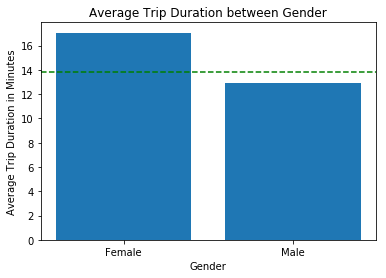

In [36]:
# Create a bar chart
labels = ['Female', 'Male']
heights = df_clean_gender_mean
labels = df_clean_gender_mean.index.str.replace('_', ' ').str.title() 

plt.bar(labels, heights, tick_label = labels)
plt.title('Average Trip Duration between Gender')
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration in Minutes')

mean = df_clean['duration_min'].mean()
plt.axhline(mean, color='green', linestyle='--')
plt.savefig('Avg Trip between Gender');

The dotted line in the bar plot represents its relation to the overall average trip duration for all bike riders.

In [37]:
# Record average time duration for all
mean

13.820758541754026

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of my points were as expected, nothing was unusual to make any major transformations. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the member_gender variables, there were entries of 'Other'. With this, I decided to remove these 'Other' entries to be consistent with my data analysis. In doing so, I can focus on how gender may play a role in the average trip duration between females and males.

#### Bivariate Exploration

I will further explore the dataset by user type (customer or subscriber) to the gender and check the average duration of bike rides in minutes between subscribers who are female to male and customers who are female to male. I will also continue to compare the two alternatives for those variables.

In [38]:
# Check counts of Subscribers and Customers
df_clean['user_type'].str.contains('Subscriber').value_counts()

True     387763
False     47335
Name: user_type, dtype: int64

In [39]:
# Check counts of Subscribers and Customers
df_clean['user_type'].str.contains('Customer').value_counts()

False    387763
True      47335
Name: user_type, dtype: int64

In [40]:
# Check sum of Subscribers and Customers
387763 + 47335

435098

In [41]:
# Find means by user type
df_clean_user_mean = df_clean.groupby('user_type').duration_min.mean()
df_clean_user_mean

user_type
Customer      31.471878
Subscriber    11.666051
Name: duration_min, dtype: float64

In [42]:
# Find customers who are females
cond1 = df_clean["user_type"] == 'Customer'    
cond2 = df_clean["member_gender"] == 'Female'

cust_fem = df_clean[cond1 & cond2]
cust_fem

user_type member_gender  member_age  duration_min
1       Customer        Female        52.0   1313.333333
6       Customer        Female        26.0     75.116667
33      Customer        Female        26.0     13.016667
97      Customer        Female        24.0     18.883333
99      Customer        Female        28.0      3.733333
151     Customer        Female        33.0     16.883333
154     Customer        Female        27.0     16.816667
159     Customer        Female        28.0      3.133333
181     Customer        Female        39.0     10.800000
205     Customer        Female        28.0     10.516667
223     Customer        Female        33.0     26.016667
237     Customer        Female        33.0     15.366667
254     Customer        Female        39.0     11.200000
263     Customer        Female        39.0     19.066667
298     Customer        Female        36.0     56.450000
320     Customer        Female        21.0    462.716667
323     Customer        Female        27.0    398.500000
324     Customer        Female        39.0     21.183333
335     Customer        Female        32.0      4.816667
336     Customer        Female        29.0      5.250000
357     Customer        Female        23.0     35.966667
371     Customer        Female        23.0     80.950000
395     Customer        Female        23.0     13.983333
418     Customer        Female        40.0     10.083333
437     Customer        Female        27.0     12.483333
440     Customer        Female        40.0     14.450000
450     Customer        Female        28.0     18.883333
475     Customer        Female        40.0      9.700000
484     Customer        Female        18.0      6.316667
485     Customer        Female        46.0      6.666667
...          ...           ...         ...           ...
517512  Customer        Female        27.0     27.250000
517525  Customer        Female        36.0     44.066667
517526  Customer        Female        33.0     51.900000
517569  Customer        Female        34.0     20.050000
517571  Customer        Female        31.0     20.333333
517573  Customer        Female        36.0     47.283333
517665  Customer        Female        48.0     95.633333
517670  Customer        Female        33.0     29.383333
517719  Customer        Female        36.0     19.733333
517720  Customer        Female        27.0     26.050000
517724  Customer        Female        23.0     12.983333
517906  Customer        Female        37.0      6.183333
518145  Customer        Female        24.0      9.633333
518157  Customer        Female        27.0      7.700000
518158  Customer        Female        24.0     17.883333
518233  Customer        Female        24.0     11.933333
518389  Customer        Female        32.0     13.433333
518414  Customer        Female        37.0     19.866667
518680  Customer        Female        37.0     18.650000
518689  Customer        Female        29.0     17.500000
518710  Customer        Female        27.0     15.883333
518717  Customer        Female        32.0    135.333333
519077  Customer        Female        29.0    422.733333
519121  Customer        Female        27.0     12.966667
519235  Customer        Female        27.0     21.366667
519246  Customer        Female        30.0      8.716667
519374  Customer        Female        30.0     11.583333
519471  Customer        Female        30.0     19.600000
519473  Customer        Female        25.0     23.366667
519484  Customer        Female        43.0    150.466667

[14612 rows x 4 columns]

In [43]:
# Find statistics for females customers to obtain mean
cust_fem.describe()

member_age  duration_min
count  14612.000000  14612.000000
mean      31.590953     37.016251
std        8.362354    102.442378
min       18.000000      1.016667
25%       26.000000     11.583333
50%       30.000000     17.516667
75%       35.000000     26.416667
max       60.000000   1437.533333

In [44]:
# Find customers who are males
cond3 = df_clean["user_type"] == 'Customer'    
cond4 = df_clean["member_gender"] == 'Male'

cust_male = df_clean[cond3 & cond4]
cust_male

user_type member_gender  member_age  duration_min
0       Customer          Male        30.0   1335.166667
46      Customer          Male        26.0      8.966667
52      Customer          Male        23.0     11.783333
98      Customer          Male        30.0     24.166667
100     Customer          Male        29.0      3.416667
123     Customer          Male        25.0     20.233333
141     Customer          Male        24.0     10.750000
155     Customer          Male        27.0     16.600000
160     Customer          Male        29.0      3.150000
173     Customer          Male        25.0     15.416667
182     Customer          Male        38.0     11.300000
206     Customer          Male        29.0     10.950000
225     Customer          Male        35.0      9.600000
253     Customer          Male        38.0      9.650000
264     Customer          Male        38.0     17.716667
292     Customer          Male        23.0      7.533333
294     Customer          Male        23.0      8.800000
300     Customer          Male        31.0      7.966667
310     Customer          Male        23.0     26.600000
314     Customer          Male        31.0     10.683333
318     Customer          Male        27.0     35.833333
319     Customer          Male        30.0     35.700000
321     Customer          Male        31.0      7.800000
325     Customer          Male        38.0     21.400000
337     Customer          Male        31.0     75.350000
345     Customer          Male        37.0     27.933333
367     Customer          Male        23.0     13.233333
389     Customer          Male        31.0      6.300000
396     Customer          Male        26.0     13.466667
416     Customer          Male        23.0     18.616667
...          ...           ...         ...           ...
518702  Customer          Male        49.0     10.683333
518738  Customer          Male        50.0      6.866667
518783  Customer          Male        29.0      8.316667
518786  Customer          Male        29.0     23.033333
518810  Customer          Male        23.0     54.700000
518938  Customer          Male        47.0      9.900000
518947  Customer          Male        37.0     13.866667
518973  Customer          Male        38.0     18.166667
519062  Customer          Male        43.0      8.633333
519089  Customer          Male        36.0     85.683333
519094  Customer          Male        40.0      7.750000
519107  Customer          Male        40.0     62.833333
519112  Customer          Male        54.0     84.200000
519115  Customer          Male        58.0     17.400000
519117  Customer          Male        19.0     55.216667
519164  Customer          Male        28.0     22.283333
519179  Customer          Male        51.0      7.266667
519186  Customer          Male        27.0     10.633333
519212  Customer          Male        32.0      5.866667
519230  Customer          Male        40.0      8.783333
519242  Customer          Male        53.0     61.816667
519265  Customer          Male        54.0     17.033333
519370  Customer          Male        23.0     15.666667
519373  Customer          Male        23.0     14.566667
519472  Customer          Male        31.0     21.466667
519476  Customer          Male        28.0    157.016667
519482  Customer          Male        40.0     14.016667
519519  Customer          Male        45.0      1.766667
519574  Customer          Male        28.0     29.966667
519636  Customer          Male        43.0     90.683333

[32723 rows x 4 columns]

In [45]:
# Find statistics for males customers to obtain mean
cust_male.describe()

member_age  duration_min
count  32723.000000  32723.000000
mean      33.596645     28.996115
std        8.873089     84.136201
min       18.000000      1.016667
25%       27.000000      9.316667
50%       32.000000     14.533333
75%       39.000000     22.633333
max       60.000000   1432.916667

In [46]:
# Find subscribers who are females
cond5 = df_clean["user_type"] == 'Subscriber'    
cond6 = df_clean["member_gender"] == 'Female'

sub_female = df_clean[cond5 & cond6]
sub_female

user_type member_gender  member_age  duration_min
4       Subscriber        Female        20.0    726.716667
15      Subscriber        Female        37.0     25.733333
32      Subscriber        Female        37.0     12.216667
41      Subscriber        Female        34.0     13.666667
58      Subscriber        Female        49.0      9.200000
64      Subscriber        Female        23.0      9.116667
70      Subscriber        Female        34.0     13.283333
103     Subscriber        Female        39.0     15.783333
137     Subscriber        Female        29.0     11.933333
140     Subscriber        Female        28.0     14.966667
153     Subscriber        Female        30.0     10.633333
156     Subscriber        Female        37.0      9.866667
163     Subscriber        Female        49.0      6.866667
166     Subscriber        Female        41.0      6.450000
172     Subscriber        Female        25.0     15.683333
176     Subscriber        Female        40.0     15.166667
192     Subscriber        Female        24.0     28.283333
193     Subscriber        Female        37.0      3.600000
198     Subscriber        Female        23.0     12.916667
201     Subscriber        Female        23.0     10.983333
202     Subscriber        Female        21.0      4.233333
207     Subscriber        Female        21.0      4.066667
245     Subscriber        Female        31.0     21.316667
256     Subscriber        Female        29.0     17.733333
257     Subscriber        Female        37.0      2.683333
258     Subscriber        Female        31.0      3.250000
260     Subscriber        Female        49.0      4.216667
272     Subscriber        Female        41.0      7.816667
273     Subscriber        Female        23.0      4.800000
278     Subscriber        Female        32.0     12.700000
...            ...           ...         ...           ...
519395  Subscriber        Female        37.0      9.100000
519397  Subscriber        Female        37.0      8.833333
519401  Subscriber        Female        28.0     13.566667
519407  Subscriber        Female        37.0      2.166667
519413  Subscriber        Female        48.0     34.850000
519450  Subscriber        Female        40.0     13.250000
519455  Subscriber        Female        30.0     14.916667
519457  Subscriber        Female        34.0     18.750000
519459  Subscriber        Female        43.0     19.333333
519463  Subscriber        Female        40.0      2.116667
519478  Subscriber        Female        21.0     10.533333
519491  Subscriber        Female        29.0      9.866667
519531  Subscriber        Female        52.0     13.083333
519537  Subscriber        Female        43.0      4.550000
519550  Subscriber        Female        32.0      5.400000
519556  Subscriber        Female        32.0     24.716667
519565  Subscriber        Female        45.0      6.416667
519571  Subscriber        Female        30.0      6.350000
519579  Subscriber        Female        42.0     44.450000
519590  Subscriber        Female        29.0     23.850000
519599  Subscriber        Female        28.0     13.050000
519628  Subscriber        Female        45.0     15.100000
519638  Subscriber        Female        21.0     11.850000
519641  Subscriber        Female        29.0      7.333333
519654  Subscriber        Female        55.0     12.900000
519667  Subscriber        Female        38.0     40.516667
519670  Subscriber        Female        40.0      2.050000
519678  Subscriber        Female        33.0      4.466667
519683  Subscriber        Female        33.0     14.816667
519697  Subscriber        Female        32.0      7.066667

[82262 rows x 4 columns]

In [47]:
# Find statistics for females subscribers to obtain mean
sub_female.describe()

member_age  duration_min
count  82262.000000  82262.000000
mean      35.159016     13.519596
std        9.014801     35.750348
min       18.000000      1.016667
25%       29.000000      6.616667
50%       33.000000      9.983333
75%       40.000000     14.766667
max       60.000000   1434.583333

In [48]:
# Find subscribers who are males
cond7 = df_clean["user_type"] == 'Subscriber'    
cond8 = df_clean["member_gender"] == 'Male'

sub_male = df_clean[cond7 & cond8]
sub_male

user_type member_gender  member_age  duration_min
12      Subscriber          Male        27.0     36.383333
13      Subscriber          Male        27.0     36.166667
16      Subscriber          Male        38.0     24.566667
19      Subscriber          Male        46.0     20.266667
20      Subscriber          Male        25.0      6.433333
22      Subscriber          Male        32.0      7.033333
28      Subscriber          Male        38.0     14.516667
34      Subscriber          Male        39.0      7.916667
35      Subscriber          Male        37.0      2.533333
36      Subscriber          Male        24.0      4.150000
39      Subscriber          Male        40.0      4.050000
40      Subscriber          Male        33.0     13.883333
47      Subscriber          Male        39.0      9.616667
48      Subscriber          Male        50.0      6.966667
54      Subscriber          Male        43.0     20.666667
59      Subscriber          Male        55.0      9.100000
60      Subscriber          Male        28.0      3.266667
62      Subscriber          Male        30.0      5.383333
63      Subscriber          Male        31.0     10.466667
65      Subscriber          Male        53.0     18.766667
66      Subscriber          Male        33.0      6.866667
69      Subscriber          Male        33.0     12.266667
71      Subscriber          Male        39.0     25.866667
72      Subscriber          Male        26.0     26.416667
75      Subscriber          Male        34.0      6.800000
76      Subscriber          Male        37.0     44.100000
77      Subscriber          Male        31.0      5.633333
86      Subscriber          Male        59.0     32.683333
91      Subscriber          Male        38.0      3.533333
95      Subscriber          Male        38.0     15.283333
...            ...           ...         ...           ...
519659  Subscriber          Male        29.0      3.766667
519661  Subscriber          Male        28.0     10.683333
519662  Subscriber          Male        33.0     10.250000
519664  Subscriber          Male        46.0      1.200000
519665  Subscriber          Male        33.0      6.233333
519668  Subscriber          Male        45.0      2.066667
519671  Subscriber          Male        35.0      1.216667
519672  Subscriber          Male        33.0     31.816667
519673  Subscriber          Male        28.0     31.800000
519674  Subscriber          Male        38.0     11.200000
519675  Subscriber          Male        48.0     10.033333
519676  Subscriber          Male        46.0     14.883333
519677  Subscriber          Male        33.0     18.933333
519679  Subscriber          Male        30.0      5.350000
519680  Subscriber          Male        44.0     13.283333
519681  Subscriber          Male        30.0     12.000000
519682  Subscriber          Male        30.0      8.066667
519684  Subscriber          Male        51.0      8.500000
519685  Subscriber          Male        31.0      8.100000
519687  Subscriber          Male        39.0     10.666667
519688  Subscriber          Male        38.0      6.833333
519690  Subscriber          Male        44.0      9.216667
519691  Subscriber          Male        59.0     18.100000
519692  Subscriber          Male        32.0     20.016667
519693  Subscriber          Male        34.0      9.833333
519694  Subscriber          Male        37.0     12.166667
519695  Subscriber          Male        26.0      7.250000
519696  Subscriber          Male        44.0      7.183333
519698  Subscriber          Male        36.0      6.100000
519699  Subscriber          Male        33.0      3.133333

[305501 rows x 4 columns]

In [49]:
# Find statistics for males subscribers to obtain mean
sub_male.describe()

member_age   duration_min
count  305501.000000  305501.000000
mean       36.369233      11.166949
std         9.254223      28.837056
min        18.000000       1.016667
25%        29.000000       5.650000
50%        35.000000       8.483333
75%        43.000000      12.466667
max        60.000000    1428.050000

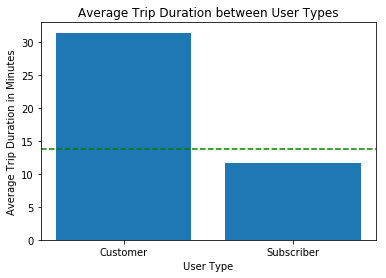

In [50]:
# Create a bar chart for User Types

labels = ['Customer', 'Subscriber']
heights = df_clean_user_mean
labels = df_clean_user_mean.index.str.replace('_', ' ').str.title() 

plt.bar(labels, heights, tick_label = labels)
plt.title('Average Trip Duration between User Types')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration in Minutes')

mean = df_clean['duration_min'].mean()

plt.axhline(mean, color='green', linestyle='--')
plt.savefig('Avg Trip between Users');

The dotted line in the bar plot represents its relation to the overall average trip duration for all bike riders.

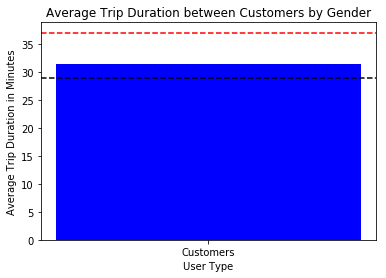

In [51]:
# Create a bar chart for Customers
labels = ['Customers']
customers = df_clean["user_type"] == 'Customer'    
customers = df_clean[customers]
customers_mean = customers['duration_min'].mean()

heights = customers_mean

plt.bar(labels, heights, tick_label = labels, color = 'blue')
plt.title('Average Trip Duration between Customers by Gender')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration in Minutes')

# Customer Mean = 31.47
# Mean 2 = Average Duration for Customers who are Females
mean2 = 37.02

# Mean 3 = Average Duration for Customers who are Males
mean3 = 29.00

# Females in Dotted Red Line
# Males in Dotted Black Line

plt.axhline(mean2, color='red', linestyle='--')
plt.axhline(mean3, color='black', linestyle='--')
plt.savefig('Avg Trip between Customers by Gender');

The red dotted line in the bar plot represents female customers and their  relation to the average trip duration for all customers.

The black dotted line in the bar plot represents male customers and their relation to the average trip duration for all customers.

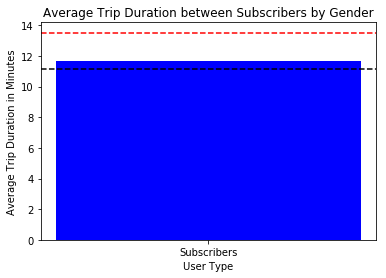

In [52]:
# Create a bar chart for Subscribers
labels = ['Subscribers']
subscribers = df_clean["user_type"] == 'Subscriber'    
subscribers = df_clean[subscribers]
subscribers_mean = subscribers['duration_min'].mean()

heights = subscribers_mean

plt.bar(labels, heights, tick_label = labels, color = 'b')
plt.title('Average Trip Duration between Subscribers by Gender')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration in Minutes')

# Subscriber Mean = 11.67
# Mean 4 = Average Duration for Subscribers who are Females
mean4 = 13.52

# Mean 5 = Average Duration for Subscribers who are Males
mean5 = 11.17

# Femaes in Dotted Red Line
# Males in Dotted Black Line

plt.axhline(mean4, color='red', linestyle='--')
plt.axhline(mean5, color='black', linestyle='--')
plt.savefig('Avg Trip between Subscribers by Gender');

The red dotted line in the bar plot represents female subscribers and their  relation to the average trip duration for all subscribers.

The black dotted line in the bar plot represents male subscribers and their relation to the average trip duration for all subscribers.

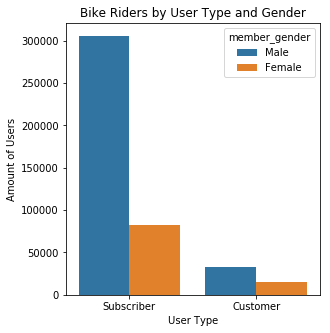

In [53]:
# Create bar chart with subplot
plt.figure(figsize = [10, 5])

plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Amount of Users')
g.set_title('Bike Riders by User Type and Gender')
plt.savefig('Bike Riders by User Type and Gender');

This bar plot represents the breakdown of subscribers and customers by gender to obtain an idea of how they represented among bike riders for this bike-sharing system for year 2017. We can see there is significantly higher amount of subscribers than to customers and same goes for gender, there is much more males than females.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The overall average trip duration for all entries was 13.82 minutes.

Looking at the divide of gender, the average for females was 17.06 minutes and for males 12.89 minutes. Females were above overall average and males were below.

Looking at the divide of user type, the average for customers was 31.47 minutes and for subscribers 11.67 minutes. Customers were above overall average and subscribers were below.

**Averages**

*All Customers*: 31.47 minutes

*Female Customers*: 37.02 minutes 

*Male Customers*: 29.00 minutes 

_________________________________

*All Subscribers*: 11.67 minutes

*Female Subscribers*: 13.52 minutes

*Male Subscribers*: 11.17 minutes



Interestingly, adding the factor of user type: 
Female Customers & Females Subscribers were also above its average while Male Customers and Male Subscribers were below average.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationships were found in the association between user type (customer and subscriber) to average trip duration. Customers have a significantly higher average trip duration than subscribers, their average trip duration is nearly twice as long. Even with the factor of user type, females still have a higher average than males.

There also seems to be a correlation to gender to average trip duration. Females generally have a higher average trip duration than males even with disregard to their user type as a customer or subscriber. 

To note: they are more entries of males and subscribers than we have for females and customers, so with this limited data, it may not be representative of findings. More entries of females and customers may offer new findings. 

#### Multivariate Exploration

I will finish exploring the dataset by adding member age to further examine the average duration of bike rides in minutes among user type and gender.

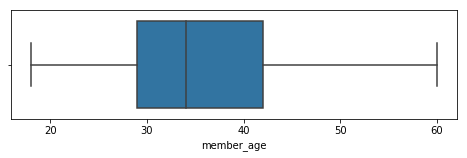

In [54]:
# Create boxplot of member_age

plt.figure(figsize = [8, 2])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_age', color=base_color)
plt.savefig('BoxPlot of Member Age');

Most of the data entries fall under the 30-40 age range based on this boxplot.

In [55]:
# Find entries for those between ages 0-20
age_20 = df_clean.loc[(df_clean['member_age'] <=20)]

In [56]:
# Find entries for those between ages 20-40
age_40 = df_clean.loc[(df_clean['member_age'] > 20) & (df_clean['member_age'] <= 40)]

In [57]:
# Find entries for those between ages 40-60
age_60 = df_clean.loc[(df_clean['member_age'] > 40) & (df_clean['member_age'] <= 60)]

In [58]:
# Find counts of each age group
len(age_20), len(age_40), len(age_60)

(4173, 310204, 120721)

In [59]:
# Find means of each age group
mean_20 = age_20['duration_min'].mean()
mean_40 = age_40['duration_min'].mean()
mean_60 = age_60['duration_min'].mean()

mean_20, mean_40, mean_60

(24.61149053438777, 13.662546367336992, 13.854293094545755)

In [60]:
# Record all means with their values rounded
mean_all = 13.82
mean_20 = 24.61
mean_40 = 13.66
mean_60 = 13.84

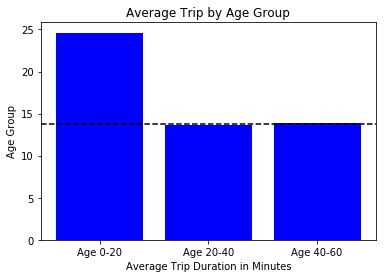

In [61]:
# Create plot
labels = ['Age 0-20', 'Age 20-40', 'Age 40-60']
heights = mean_20, mean_40, mean_60

plt.bar(labels, heights, tick_label = labels, color = 'b')
plt.title('Average Trip by Age Group')
plt.xlabel('Average Trip Duration in Minutes')
plt.ylabel('Age Group')

plt.axhline(mean_all, color='black', linestyle='--')
plt.savefig('Average Trip by Age Group');

The dotted line in the bar plot represents its relation to the overall average trip duration for all bike riders.

In [62]:
# Find counts for subscribers under age groups

subscribers_20 = age_20.loc[(age_20["user_type"] == 'Subscriber')] 
subscribers_40 = age_40.loc[(age_40["user_type"] == 'Subscriber')] 
subscribers_60 = age_60.loc[(age_60["user_type"] == 'Subscriber')] 
len(subscribers_20), len(subscribers_40), len(subscribers_60)

(2424, 273481, 111858)

In [63]:
# Find means for subscribers under age groups

mean_sub_20 = subscribers_20['duration_min'].mean()
mean_sub_40 = subscribers_40['duration_min'].mean()
mean_sub_60 = subscribers_60['duration_min'].mean()

mean_sub_20 , mean_sub_40 , mean_sub_60 

(13.578424092409211, 11.3642254854999, 12.362541794060402)

In [64]:
# Find counts for customers under age groups

customers_20 = age_20.loc[(age_20["user_type"] == 'Customer')] 
customers_40 = age_40.loc[(age_40["user_type"] == 'Customer')] 
customers_60 = age_60.loc[(age_60["user_type"] == 'Customer')] 
len(customers_20), len(customers_40), len(customers_60)

(1749, 36723, 8863)

In [65]:
# Find means for customers under age groups

mean_cust_20 = customers_20['duration_min'].mean()
mean_cust_40 = customers_40['duration_min'].mean()
mean_cust_60 = customers_60['duration_min'].mean()

mean_cust_20 , mean_cust_40 , mean_cust_60 

(39.90260148656365, 30.778443573055952, 32.68136259355377)

In [66]:
# Find counts for females under age groups

fem_20 = age_20.loc[(age_20["member_gender"] == 'Female')] 
fem_40 = age_40.loc[(age_40["member_gender"] == 'Female')] 
fem_60 = age_60.loc[(age_60["member_gender"] == 'Female')] 
len(fem_20), len(fem_40), len(fem_60)

(1283, 73147, 22444)

In [67]:
# Find means for females under age groups

mean_fem_20 = fem_20['duration_min'].mean()
mean_fem_40 = fem_40['duration_min'].mean()
mean_fem_60 = fem_60['duration_min'].mean()

mean_fem_20 , mean_fem_40 , mean_fem_60 

(29.007898155365016, 16.81219052045866, 17.20067872631126)

In [68]:
# Find counts for males under age groups

male_20 = age_20.loc[(age_20["member_gender"] == 'Male')] 
male_40 = age_40.loc[(age_40["member_gender"] == 'Male')] 
male_60 = age_60.loc[(age_60["member_gender"] == 'Male')] 
len(male_20), len(male_40), len(male_60)

(2890, 237057, 98277)

In [69]:
# Find means for males under age groups

mean_male_20 = male_20['duration_min'].mean()
mean_male_40 = male_40['duration_min'].mean()
mean_male_60 = male_60['duration_min'].mean()

mean_male_20 , mean_male_40 , mean_male_60 

(22.659728950403622, 12.69068297216833, 13.090062612140418)

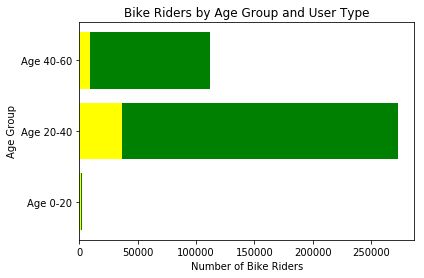

In [70]:
# Create plot for user types by age group
labels = ['Age 0-20', 'Age 20-40', 'Age 40-60']
subscribers_20 = 2424
subscribers_40 = 273481
subscribers_60 = 111858

customers_20 = 1749
customers_40 = 36723 
customers_60 = 8863

heights = subscribers_20, subscribers_40, subscribers_60
heights2 = customers_20, customers_40, customers_60

plt.barh(labels, heights, tick_label = labels, color = 'green')
plt.barh(labels, heights2, tick_label = labels, color = 'yellow')
plt.title('Bike Riders by Age Group and User Type')
plt.xlabel('Number of Bike Riders')
plt.ylabel('Age Group')

plt.savefig('Bike Riders by Age Group and User Type');

Subscribers are represented in green and Customers are represented in yellow.

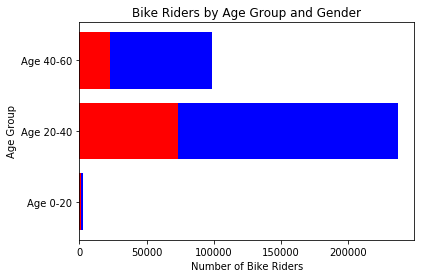

In [71]:
# Create plot for genders by age group

labels = ['Age 0-20', 'Age 20-40', 'Age 40-60']

fem_20 = 1283
fem_40 = 73147
fem_60 = 22444

male_20 = 2890
male_40 = 237057
male_60 = 98277

heights3 = fem_20, fem_40, fem_60
heights4 = male_20, male_40, male_60

plt.barh(labels, heights4, tick_label = labels, color = 'blue')
plt.barh(labels, heights3, tick_label = labels, color = 'red') 

plt.title('Bike Riders by Age Group and Gender')
plt.xlabel('Number of Bike Riders')
plt.ylabel('Age Group')
plt.savefig('Bike Riders by Age Group and Gender');

Males are represented in blue and Females are represented in red.

These two bar plots above for Bike Riders provide a visual of how riders differ in age and user type, and then age and gender. To read these bar plots, the lower end of comparsion shows its proportion to the higher end. For example in the age group 20-40, there are 73,147 females to 237,057 males.

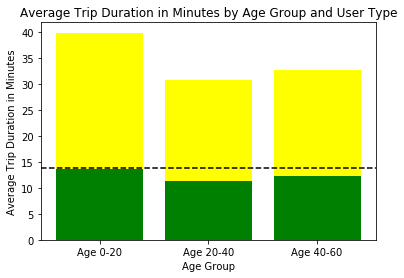

In [72]:
# Create a bar plot for Age Group and User Type 
labels = ['Age 0-20', 'Age 20-40', 'Age 40-60']

h1 = mean_sub_20 , mean_sub_40 , mean_sub_60, 
h2 = mean_cust_20 , mean_cust_40 , mean_cust_60 

plt.bar(labels, h2, tick_label = labels, color = 'yellow')
plt.bar(labels, h1, tick_label = labels, color = 'green')

plt.title('Average Trip Duration in Minutes by Age Group and User Type')
plt.xlabel('Age Group')
plt.ylabel('Average Trip Duration in Minutes')
plt.axhline(mean, color='black', linestyle='--')
plt.savefig('Average Trip Duration in Minutes by Age Group and User Type');

The dotted line in the bar plot represents its relation to the overall average trip duration for all bike riders.

Subscribers are represented in green and Customers are represented in yellow.

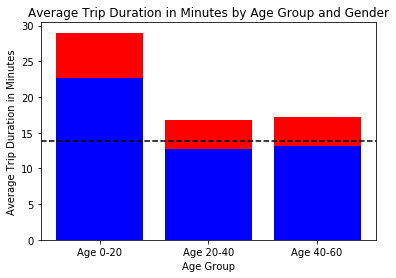

In [73]:
labels = ['Age 0-20', 'Age 20-40', 'Age 40-60']

h3 = mean_male_20 , mean_male_40 , mean_male_60 
h4 = mean_fem_20 , mean_fem_40 , mean_fem_60 

plt.bar(labels, h4, tick_label = labels, color ='red') 
plt.bar(labels, h3, tick_label = labels, color = 'blue')

plt.title('Average Trip Duration in Minutes by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Trip Duration in Minutes')
plt.axhline(mean, color='black', linestyle='--')
plt.savefig('Average Trip Duration in Minutes by Age Group and Gender');

The dotted line in the bar plot represents its relation to the overall average trip duration for all bike riders.

Males are represented in blue and Females are represented in red.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of average trip duration against age in this section by looking at its impact to the other two categorical quality features of gender and user type. The multivariate exploration here showed that there is a correlation between age group with user type and gender to average trip duration. Among the three age groups, the youngest age group of Age 0-20 had the highest average trip duration as expected. However, the Age 40-60 group had a slightly higher average than Age 20-40. There is only a 0.19 of a second difference so there may be little or correlation between these age groups but interesting enough to note.

The overall average found at the start of the investigation was 13.82 minutes where the averages for the age groups of 20-40 and 40-60 are very close to. This suggest that riders from 0 to 20 in age generally have a higher average trip duration for bike rides than others of different age. 
____________________________________________
**Averages among Age Group**

*Age 0-20*: 24.61 minutes

*Age 20-40*: 13.66 minutes

*Age 40-60*: 13.85 minutes

### Were there any interesting or surprising interactions between features?

Looking back on the bar plots, there seems to be some connections between the categorical features of user type, gender, age group to average trip duration. They all seem to be dependent in some sense. For more depth about age group, age 20-40 had a lower average when against user type and gender. Perhaps with life happenings, the age group for 0-20 and 40-60 may have more free time to enjoy longer bike rides. Age 20-40 may be using this bike-sharing for commute purposes rather then leisure. 
________________________________________
**Averages for Gender based on Age Group**

*Females 0-20*: 29.01 minutes

*Females 20-40*: 16.81 minutes

*Females 40-60*: 17.20 minutes
__________________________________________
*Males 0-20*: 22.66 minutes

*Males 20-40*:  12.69 minutes

*Males 40-60*:  13.09 minutes

____________________________________________

**Averages for User Type based on Age Group**

*Customers 0-20*: 39.90 minutes

*Customers 20-40*: 30.78 minutes

*Customers 40-60*: 32.68 minutes
_____________________________________________
*Subscribers 0-20*: 13.58 minutes

*Subscribers 20-40*: 11.36 minutes

*Subscribers 40-60*: 12.36 minutes



#### Resources
1. https://stackoverflow.com/questions/17578115/pass-percentiles-to-pandas-agg-function
2. https://stackoverflow.com/questions/53277718/pandas-dataframe-easier-syntax-to-drop-rows-by-condition-on-values
3. https://stackoverflow.com/questions/31583151/count-number-of-rows-when-row-contains-certain-text
4. https://stackoverflow.com/questions/34828701/mean-line-on-top-of-bar-plot-with-pandas-and-matplotlib/34829398
5. https://stackoverflow.com/questions/48978550/pandas-filtering-multiple-conditions
6. https://stackoverflow.com/questions/18992086/save-a-pandas-series-histogram-plot-to-file
7. https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas